In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [12]:
df = pd.read_csv("data.csv")
standings = pd.read_csv("standings.csv")
s1 = 2022
s2 = 2023

In [106]:
def plot(metric, x_min, x_max, title, subtitle):
    # Setup
    plt.rcParams["figure.figsize"] = (14, 10)
    plt.figure(dpi=400)
    fig, ax = plt.subplots()
    fig.patch.set_facecolor(Colors.WHITE)
    ax.set_facecolor(Colors.WHITE)

    # Plot data
    for y, row in standings.iterrows():
        df_s1 = df[(df["season"] == s1) & (df["team"] == row["team"])]
        df_s2 = df[(df["season"] == s2) & (df["team"] == row["team"])]
        ax.plot(
            [df_s1[metric], df_s2[metric]], [y, y], color=Colors.LIGHT_GRAY, zorder=1
        )
        ax.scatter(
            [df_s1[metric]],
            [y],
            edgecolor=NWSL.color(row["team"]),
            lw=3,
            color=Colors.WHITE,
            s=500,
        )
        ax.scatter([df_s2[metric]], [y], color=NWSL.color(row["team"]), lw=3, s=500)

    # Axes
    ax.set_xlim([x_min, x_max + 0.5])
    ax.set_xticks(range(x_min, x_max + 1, 5))
    ax.set_xticklabels(
        range(x_min, x_max + 1, 5),
        fontproperties=Fonts.BARLOW,
        size=16,
        color=Colors.BLACK,
    )
    ax.set_ylim([11.5, -0.5])
    ax.set_yticks(range(0, 12))
    ax.set_yticklabels(
        standings["team"].apply(lambda x: NWSL.name(x)),
        fontproperties=Fonts.BARLOW,
        size=16,
        color=Colors.BLACK,
    )
    ax.xaxis.grid(True, color=Colors.LIGHT_GRAY, linestyle="--")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)

    # Legend
    offset = 2 if x_max - x_min > 20 else 1
    ax.plot(
        [x_max + offset, x_max + offset],
        [0, 1],
        color=Colors.LIGHT_GRAY,
        zorder=1,
        clip_on=False,
    )
    ax.scatter(
        [x_max + offset],
        [1],
        edgecolor=Colors.BLACK,
        lw=3,
        color=Colors.WHITE,
        s=500,
        clip_on=False,
    )
    ax.scatter([x_max + offset], [0], color=Colors.BLACK, lw=3, s=500, clip_on=False)
    ax.text(
        x_max + offset * 1.5,
        1,
        "2022",
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
        va="center",
    )
    ax.text(
        x_max + offset * 1.5,
        0,
        "2023",
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
        va="center",
    )

    # Title
    ax.set_title(
        title,
        fontproperties=Fonts.BARLOW_BOLD,
        size=36,
        ha="left",
        x=0,
        y=1.1,
    )

    # Subtitle
    ax.text(
        x_min,
        -1,
        subtitle,
        fontproperties=Fonts.BARLOW,
        size=20,
        ha="left",
    )

    # Twitter logo and username
    add_twitter_handle(fig, x=0.81, y=0.04, fs=14, w=0.025)
    add_source(fig, "nwslR/nwslpy", x=0.13, y=0.04, fs=14)

    plt.savefig(
        "images/" + metric + ".png",
        bbox_inches="tight",
        transparent=False,
        pad_inches=0.5,
        dpi=200,
    )

<Figure size 5600x4000 with 0 Axes>

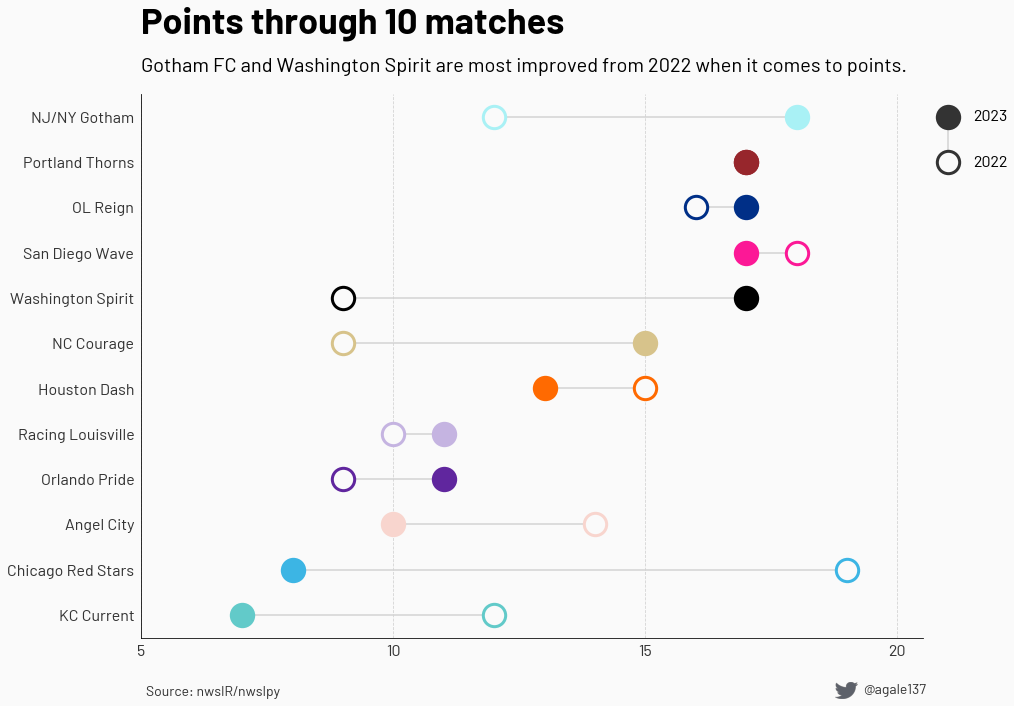

In [107]:
plot(
    "points",
    5,
    20,
    "Points through 10 matches",
    "Gotham FC and Washington Spirit are most improved from 2022 when it comes to points.",
)

<Figure size 5600x4000 with 0 Axes>

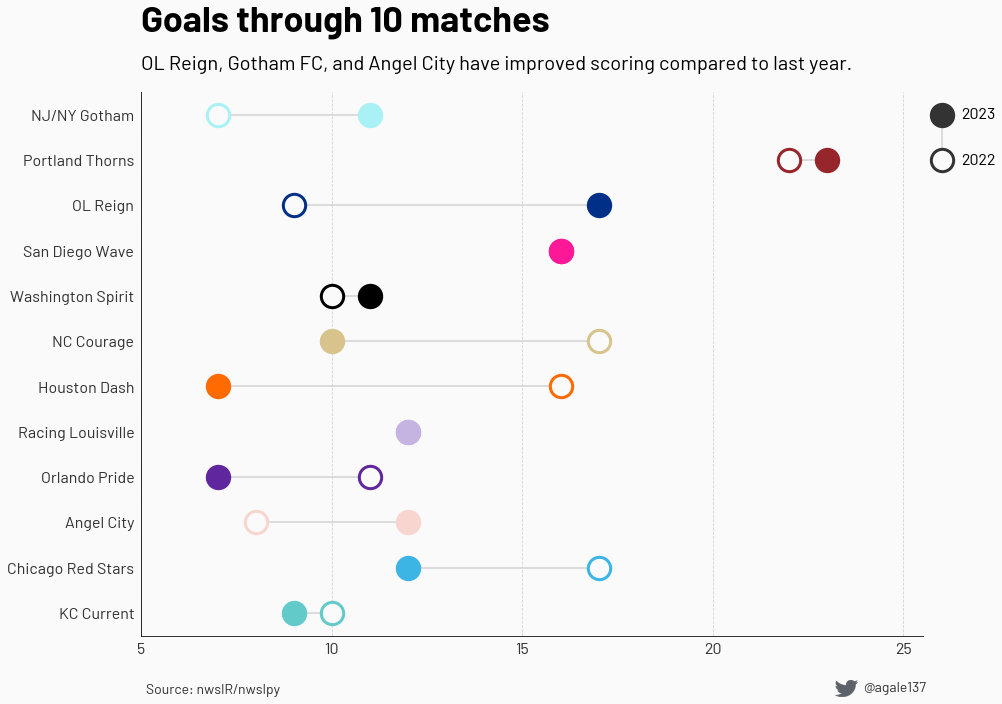

In [108]:
plot(
    "goals_for",
    5,
    25,
    "Goals through 10 matches",
    "OL Reign, Gotham FC, and Angel City have improved scoring compared to last year.",
)

<Figure size 5600x4000 with 0 Axes>

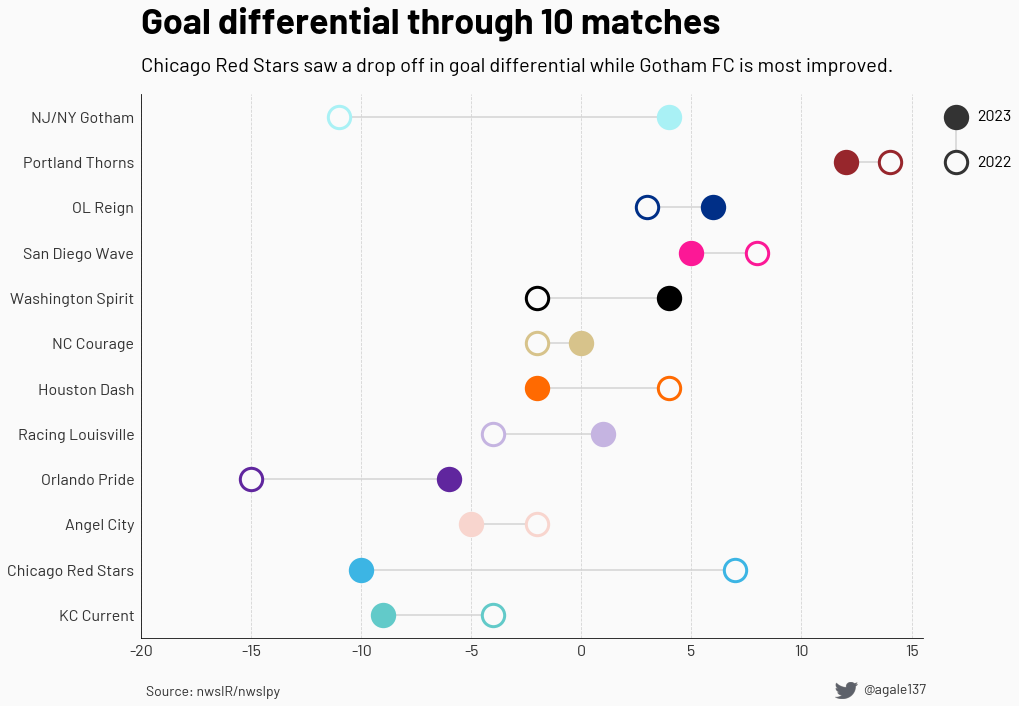

In [110]:
plot(
    "goal_differential",
    -20,
    15,
    "Goal differential through 10 matches",
    "Chicago Red Stars saw a drop off in goal differential while Gotham FC is most improved.",
)